# Versión C – Predicción de Diabetes

## Instrucciones para Examen

**Objetivo**

Este examen tiene como objetivo evaluar la capacidad del estudiante para limpiar, explorar, implementar y evaluar modelos de clasificación en un dataset de diabetes. Utilizaremos el «Diabetes Dataset» disponible en Kaggle. Los estudiantes deben demostrar habilidades prácticas en la manipulación de datos, creación de visualizaciones y modelado predictivo.

**Contexto y Descripción del Dataset**

El «Diabetes Dataset» contiene datos de salud de mujeres de ascendencia indígena Pima que viven cerca de Phoenix, Arizona, EE.UU. La tarea es predecir si un paciente tiene diabetes o no, basándose en ciertas medidas diagnósticas incluidas en el dataset.

Diccionario de Datos:
- Pregnancies: Número de embarazos.
- Glucose: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- BloodPressure: Presión arterial diastólica (mm Hg).
- SkinThickness: Espesor del pliegue cutáneo del tríceps (mm).
- Insulin: Niveles séricos de insulina a las 2 horas (mu U/ml).
- BMI: Índice de masa corporal (peso en kg / (altura en m)^2).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad (años).
- Outcome: Variable objetivo (1: diabetes, 0: no diabetes).

**Requisitos**

Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.

Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.

Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

**Entrega**

Los estudiantes deben entregar un archivo .ipynb comentado que incluya:
- Proceso completo de limpieza y preprocesamiento de datos.
- Visualizaciones y estadísticas descriptivas.
- Implementación y evaluación de los modelos de clasificación.
- Análisis comparativo del rendimiento de los modelos.

Además, el archivo debe subirse a GitHub con un tag de liberación (release tag) que permita identificar la entrega final.

**Consideraciones Éticas y Tecnológicas**

Consideraciones Éticas:
- Transparencia y Reproducibilidad: Asegúrate de que todos los pasos del análisis sean claros y reproducibles. Otros investigadores deben poder seguir tus pasos y llegar a los mismos resultados.
- Imparcialidad y Sesgo: Revisa si existen sesgos en los datos que puedan afectar la imparcialidad del modelo. Es importante que los modelos no discriminen injustamente entre diferentes grupos de datos.

Consideraciones Tecnológicas:
- Herramientas Utilizadas: Utiliza herramientas estándar como Python, Jupyter Notebook, Pandas, Scikit-learn, Matplotlib y Seaborn.
- Escalabilidad: Considera cómo las técnicas aplicadas podrían escalarse para manejar conjuntos de datos más grandes y complejos.
- Optimización de Modelos: Aunque este examen no se enfoca en la optimización de hiperparámetros, se debe tener en cuenta para futuras implementaciones y mejorar el rendimiento de los modelos.


## **Configuración**

In [1]:
#!pip install --upgrade ipywidgets
#!pip install --upgrade jupyter
#!jupyter nbextension install --py widgetsnbextension
#!jupyter nbextension enable --py widgetsnbextension
import kaggle
# Use the Kaggle API to search for datasets kaggle.api.dataset_list()
import kagglehub
# Download latest version
path = kagglehub.dataset_download("mathchi/diabetes-data-set")
print("Path to dataset files:", path)
# Importar las librerías necesarias
import os
import pandas as pd
import numpy as np
from datetime import datetime
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import f_oneway,pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error
from xgboost import XGBClassifier,XGBRegressor
from lightgbm import LGBMClassifier,LGBMRegressor

Path to dataset files: /Users/iairlinker/.cache/kagglehub/datasets/mathchi/diabetes-data-set/versions/1


In [2]:
# Replace 'diabetes.csv' with the actual file name
dataset_path = os.path.join(path, "diabetes.csv")
df = pd.read_csv(dataset_path)
# Display the first few rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## **1. Limpieza de Datos:**

### Manejo de valores faltantes adecuadamente

In [4]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


### Identificación y eliminación de valores duplicados

In [5]:
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")

Número de registros duplicados: 0


### Verificación y ajuste de tipos de datos

No se requiere, pues todos vienen ya convertidos a los tipos correctos

### **Corrección de inconsistencias en valores categóricos**

#### Rangos según condición médica

### Tabla resumen con valores de Presión Arterial, Insulina y Espesor del Pliegue Cutáneo

| **Parámetro**               | **Persona normal**                     | **Diabetes tipo 1**                     | **Diabetes tipo 2**                     |
|-----------------------------|-----------------------------------------|-----------------------------------------|-----------------------------------------|
| **Glucosa postprandial**     | Menos de 140 mg/dL                      | 180-300 mg/dL                           | 180-250 mg/dL   
| **Presión arterial**         | < 120/80 mmHg                          | < 130/80 mmHg                          | < 130/80 mmHg                           |
| **Insulina en sangre**       | 5-25 mU/mL                              | Muy bajos o indetectables               | Elevados o normales                     |
| **Espesor pliegue cutáneo**  | 5-20 mm                                 | 5-15 mm                                 | 20-40 mm                                |



La glucosa postprandial es la medición de los niveles de azúcar en la sangre después de comer. Se realiza mediante un análisis de sangre que se toma dos horas después de ingerir una comida.

### Rangos ampliados para Glucosa, Insulina, Presión Arterial y Espesor del Pliegue Cutáneo

| **Variable**               | **Rango ampliado**                     | **Explicación**                                                                 |
|----------------------------|-----------------------------------------|---------------------------------------------------------------------------------|
| **Glucosa (mg/dL)**         | 60-160                                  | Valores entre 60 y 160 se consideran aceptables, aunque pueden ser ligeramente altos o bajos. |
| **Insulina (mU/mL)**        | 3-140                                   | Valores entre 3 y 140 se consideran dentro de un rango aceptable.                |
| **Presión Arterial (mmHg)** | 50-100                                 | Valores entre 50 y 100 se consideran aceptables, aunque pueden ser ligeramente altos o bajos. |
| **Espesor Pliegue Cutáneo (mm)** | 3-25                                | Valores entre 3 y 25 se consideran dentro de un rango aceptable.                |

**Insulina**

Los valores normales de insulina en sangre pueden variar según el momento del día y el laboratorio que realiza el análisis: 
* En ayunas: Los valores normales de insulina en sangre se encuentran entre 5 y 25 unidades por mililitro (U/ml). Si los valores son superiores a 30 U/ml, se puede considerar insulinorresistencia. 
* Entre comidas y durante la noche: Los valores normales de insulina en sangre oscilan entre 60 y 100 mg/dl. 
* Después de las comidas: Los valores normales de insulina en sangre son de 140 mg/dl o menos. 

#### Identificación de valores fuera de rango

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Análisis de cuántos valores de rango tengo

In [7]:
def identificar_valores_anormales(df,rangos):
    """
    Identifica valores anormales en Glucosa, Insulina, Presión Arterial y Espesor del Pliegue Cutáneo.
    
    Parámetros:
    - df: DataFrame con las columnas 'Glucose', 'Insulin', 'BloodPressure', 'SkinThickness'.
    
    Retorna:
    - Un DataFrame con valores anormales identificados.
    """
    
    # Crear un DataFrame para almacenar los valores anormales
    anormales = pd.DataFrame(columns=df.columns)
    
    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        anormal = False
        for columna, valores in rangos.items():
            if columna in df.columns:
                valor = row[columna]
                if valores['anormal'](valor):
                    anormal = True
                    break
        
        # Si se encontró un valor anormal, agregar la fila al DataFrame de anormales
        if anormal:
            anormales = pd.concat([anormales, row.to_frame().T], ignore_index=True)
    
    return anormales

def detectar_anomalias_individuales(df, rangos):
    """
    Detecta anomalías en cada una de las métricas: Glucosa, Insulina, Presión Arterial y Espesor del Pliegue Cutáneo.
    
    Parámetros:
    - df: DataFrame con las columnas 'Glucose', 'Insulin', 'BloodPressure', 'SkinThickness'.
    
    Retorna:
    - Un diccionario con DataFrames para cada métrica, conteniendo las filas con valores anormales.
    """
    # Crear un diccionario para almacenar los valores anormales por métrica
    anomalias = {columna: pd.DataFrame(columns=df.columns) for columna in rangos.keys()}
    
    # Iterar sobre las filas del DataFrame
    for index, row in df.iterrows():
        for columna, valores in rangos.items():
            if columna in df.columns:
                valor = row[columna]
                if valores['anormal'](valor):
                    anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
    
    return anomalias

def analizar_y_graficar_anomalias(anormales):
    """
    Analiza y grafica las anomalías en cada métrica por Outcome.
    
    Parámetros:
    - anormales: DataFrame con valores anormales.
    
    Retorna:
    - Gráficos de boxplot y resumen estadístico como tablas.
    """
    # Verificar que la columna 'Outcome' esté presente
    if 'Outcome' not in anormales.columns:
        raise ValueError("El DataFrame 'anormales' debe contener la columna 'Outcome'.")
    
    # Filtrar por Outcome 0 y Outcome 1
    outcome_0 = anormales[anormales['Outcome'] == 0]
    outcome_1 = anormales[anormales['Outcome'] == 1]
    
    # Métricas a analizar
    metricas = ['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness']
    
    # Crear subplots para los boxplots
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,10))
    fig.suptitle('Boxplots de Anomalías por Outcome', fontsize=16)
    
    # Iterar sobre las métricas y graficar
    for i, metrica in enumerate(metricas):
        row = i // 2
        col = i % 2
        
        # Boxplot para Outcome 0 y Outcome 1
        sns.boxplot(x='Outcome', y=metrica, data=anormales, ax=axes[row, col])
        axes[row, col].set_title(f'{metrica} por Outcome')
        axes[row, col].set_xticks([0, 1])
        axes[row, col].set_xticklabels(['s/diab', 'c/diab'])
    
    plt.tight_layout()
    plt.show()
    
    # Crear subplots para las tablas de resumen estadístico
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6))
    fig.suptitle('Resúmenes Estadísticos por Outcome', fontsize=16)
    
    # Iterar sobre las métricas y graficar las tablas
    for i, metrica in enumerate(metricas):
        row = i // 2
        col = i % 2
        
        # Crear DataFrames para Outcome 0 y Outcome 1
        resumen_0 = outcome_0[metrica].describe().to_frame().T if not outcome_0.empty else pd.DataFrame(columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])
        resumen_1 = outcome_1[metrica].describe().to_frame().T if not outcome_1.empty else pd.DataFrame(columns=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])
        
        # Combinar los resúmenes en un solo DataFrame
        resumen_combined = pd.concat([resumen_0, resumen_1], keys=['s/diab', 'c/diab'])
        resumen_combined.index.names = ['Outcome', 'Metric']
        
        # Graficar la tabla
        axes[row, col].axis('off')  # Desactivar ejes
        table = axes[row, col].table(cellText=resumen_combined.values,
                                     colLabels=resumen_combined.columns,
                                     rowLabels=resumen_combined.index.get_level_values(0),
                                     loc='center',
                                     cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)  # Escalar la tabla para que sea más grande
        axes[row, col].set_title(f'Resumen de {metrica}', fontsize=12)
    
    plt.tight_layout()
    plt.show()

    return [outcome_0,outcome_1]
# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado 'anormales'
# analizar_y_graficar_anomalias(anormales)

In [8]:
# Definir rangos ampliados
rangos = {
    'Glucose': {'ampliado': (60, 160), 'anormal': lambda x: x < 60 or x > 160},
    'Insulin': {'ampliado': (3, 140), 'anormal': lambda x: x < 3 or x > 30},
    'BloodPressure': {'ampliado': (50, 100), 'anormal': lambda x: x < 50 or x > 100},
    'SkinThickness': {'ampliado': (3, 25), 'anormal': lambda x: x < 3}
}
anormales = detectar_anomalias_individuales(df, rangos)
anormales.keys()

/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_30756/3016414069.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_30756/3016414069.py:50: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  anomalias[columna] = pd.concat([anomalias[columna], row.to_frame().T], ignore_index=True)
/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_307

dict_keys(['Glucose', 'Insulin', 'BloodPressure', 'SkinThickness'])

In [9]:
df.corr(numeric_only=True)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


#### Glucosa

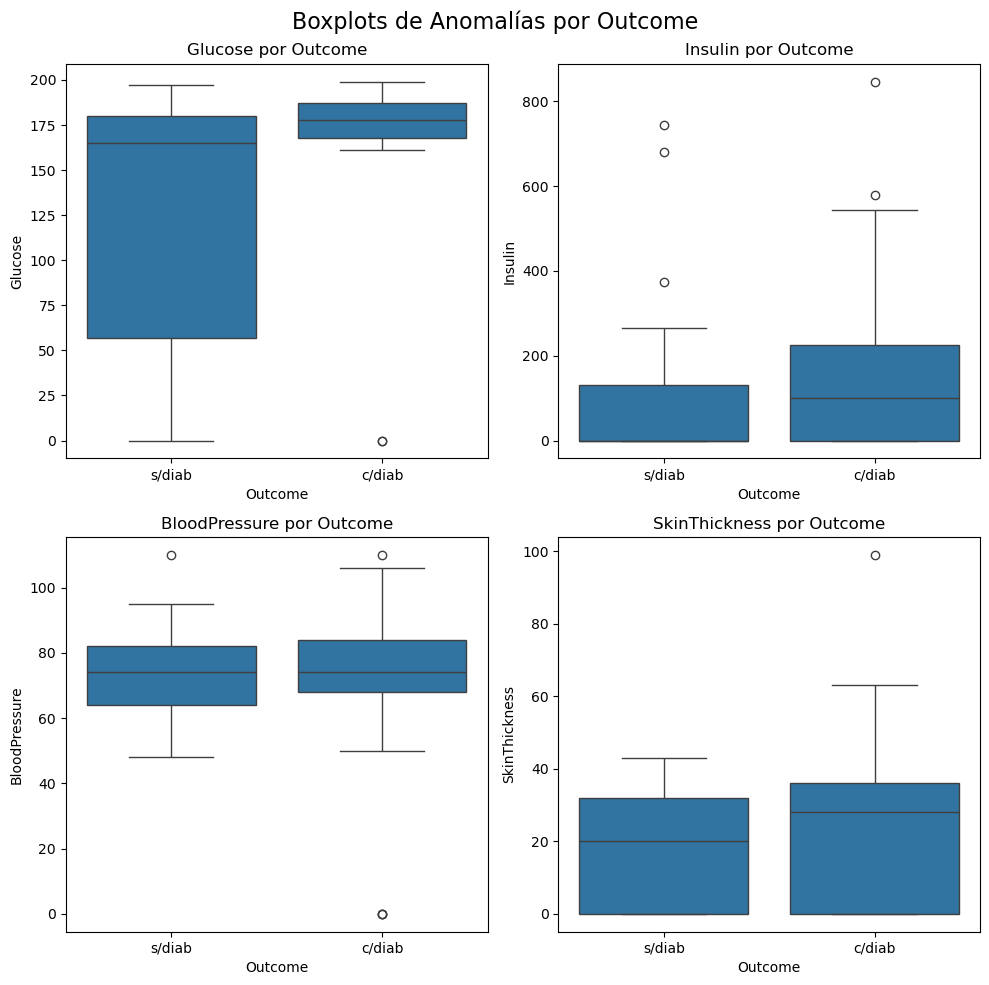

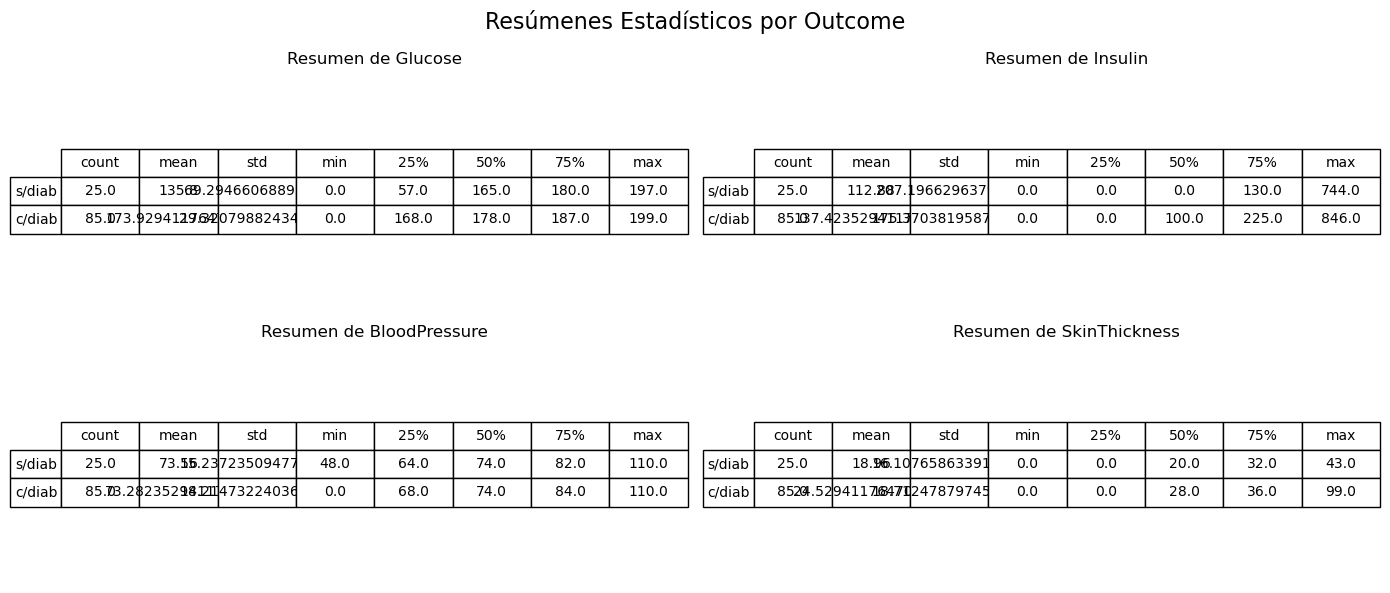

In [10]:
outcome_0,outcome_1 = analizar_y_graficar_anomalias(anormales.get('Glucose'))

In [11]:
aux = df.drop(outcome_0.index)
aux.corr()['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.475566
BMI                         0.287890
Age                         0.242022
Pregnancies                 0.218829
DiabetesPedigreeFunction    0.177039
Insulin                     0.131908
BloodPressure               0.075113
SkinThickness               0.067601
Name: Outcome, dtype: float64

#### Espesor de huesos

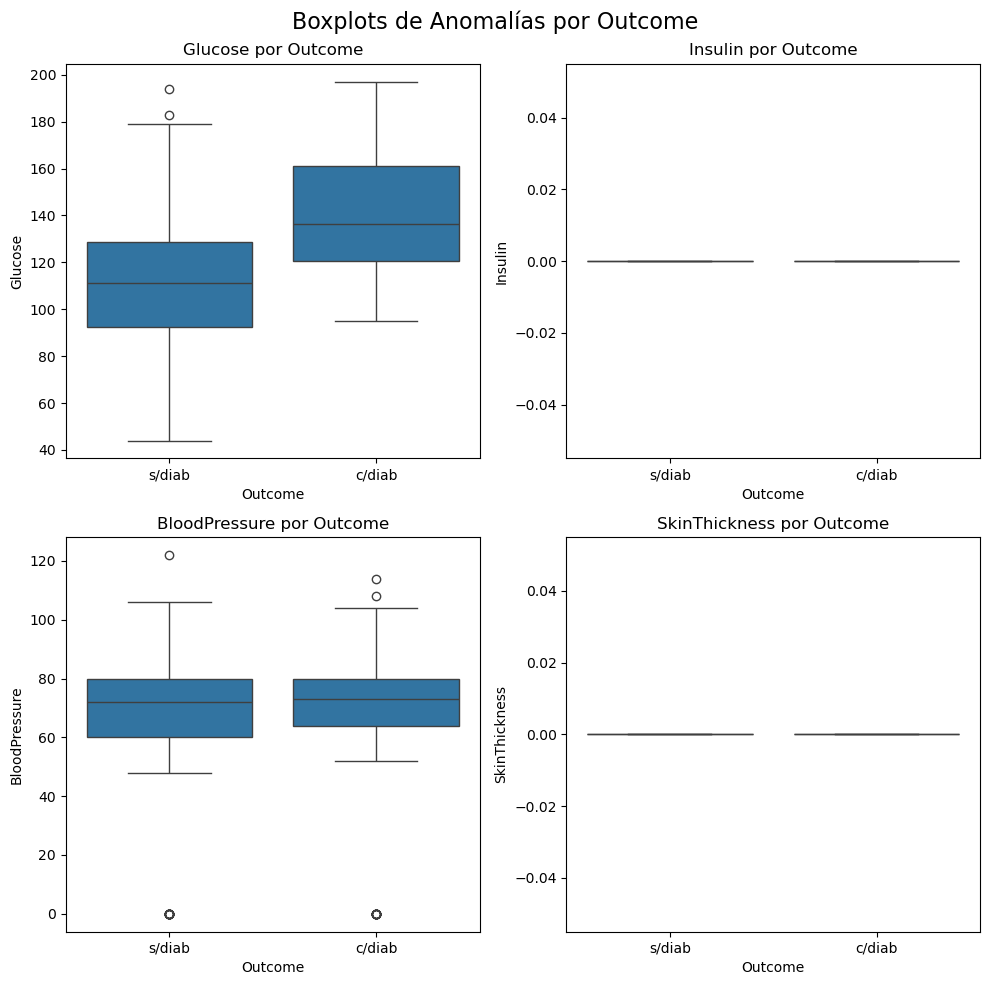

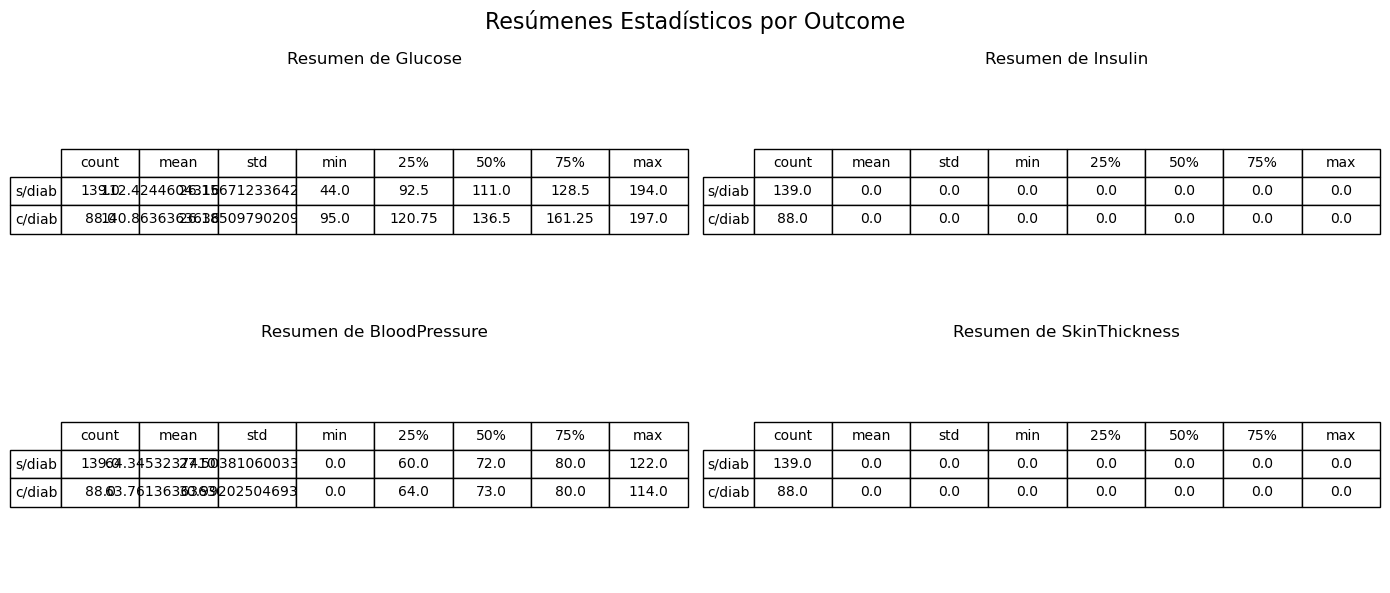

In [27]:
outcome_0,outcome_1 =  analizar_y_graficar_anomalias(anormales.get('SkinThickness'))

#### Insulina

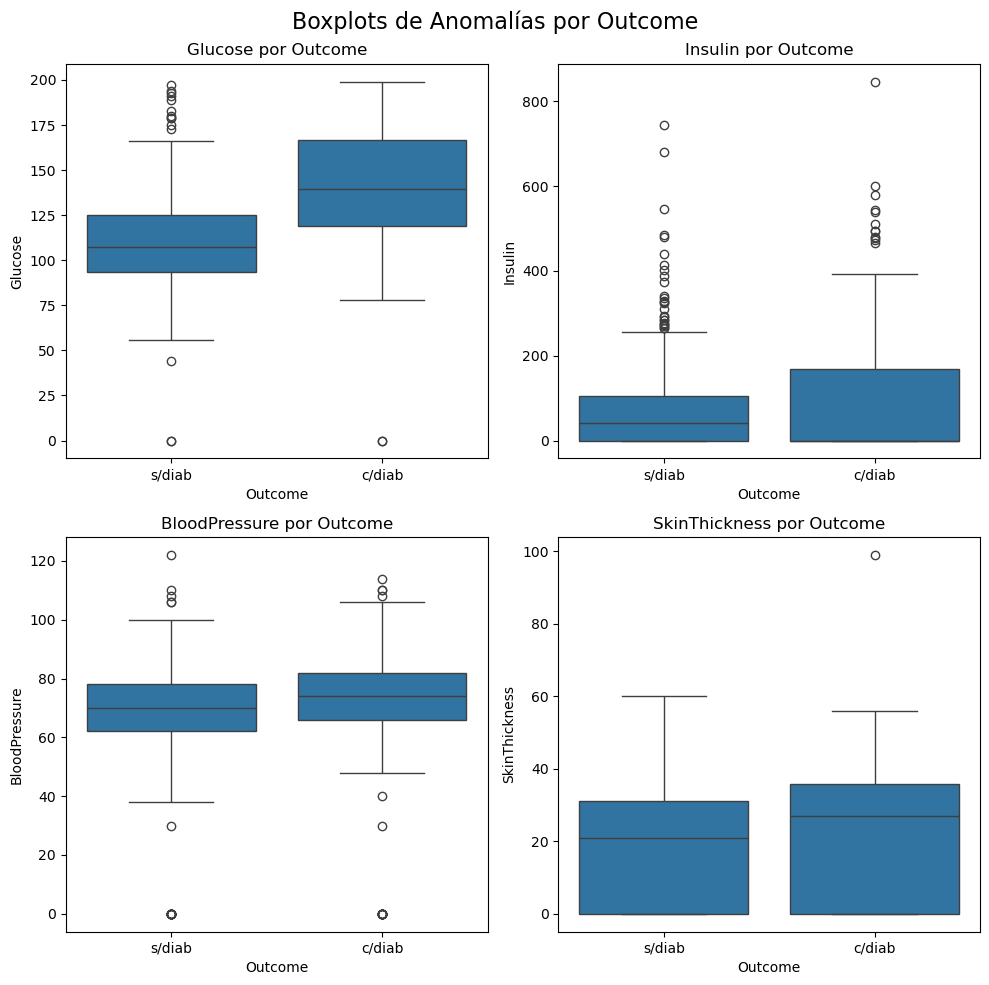

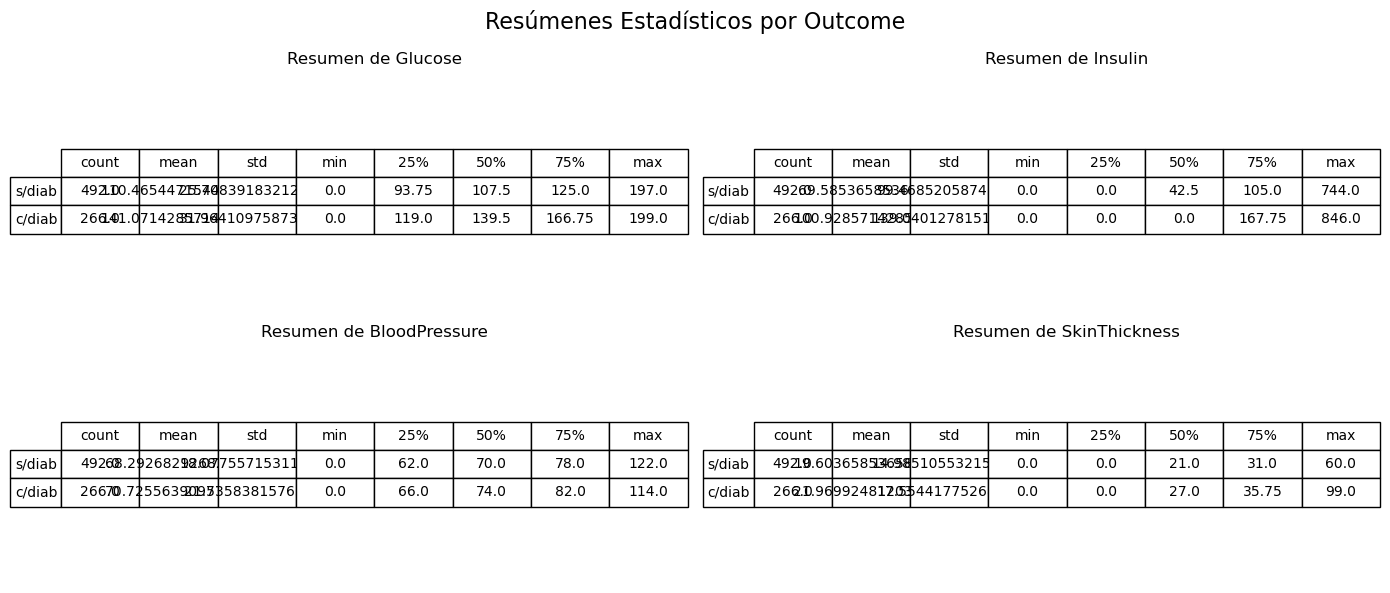

In [26]:
outcome_0,outcome_1 =  analizar_y_graficar_anomalias(anormales.get('Insulin'))

In [13]:
def categorizar_insulina(df, columna_insulina='Insulin'):
    """
    Crea una nueva columna 'insulin_cat' en el DataFrame para clasificar los valores de insulina
    en las categorías 'low', 'normal' y 'high'.
    
    Parámetros:
    - df: DataFrame que contiene la columna de insulina.
    - columna_insulina: Nombre de la columna que contiene los valores de insulina (por defecto 'Insulin').
    
    Retorna:
    - DataFrame con la nueva columna 'insulin_cat'.
    """
    # Definir los rangos para las categorías
    rangos = {
        'low': (-np.inf, 3),
        'normal': (3, 140),
        'high': (140, np.inf)
    }
    
    # Crear la columna 'insulin_cat' basada en los rangos
    df['insulin_cat'] = pd.cut(df[columna_insulina],
                               bins=[rangos['low'][0], rangos['low'][1], rangos['normal'][1], rangos['high'][1]],
                               labels=['low', 'normal', 'high'],
                               right=False)
    
    return df

# Ejemplo de uso
# Supongamos que tienes un DataFrame llamado 'df'
aux = categorizar_insulina(df)
aux.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,insulin_cat
0,6,148,72,35,0,33.6,0.627,50,1,low
1,1,85,66,29,0,26.6,0.351,31,0,low
2,8,183,64,0,0,23.3,0.672,32,1,low
3,1,89,66,23,94,28.1,0.167,21,0,normal
4,0,137,40,35,168,43.1,2.288,33,1,high


In [14]:
pd.crosstab(aux['Outcome'], aux['insulin_cat'], margins=True, normalize='index')

insulin_cat,low,normal,high
Outcome,,,
0,0.472000,0.356000,0.172000
1,0.514925,0.160448,0.324627
All,0.486979,0.287760,0.225260


In [15]:
pd.crosstab(aux['Outcome'], aux['insulin_cat'], margins=True, normalize='columns')

insulin_cat,low,normal,high,All
Outcome,,,,
0,0.631016,0.80543,0.49711,0.651042
1,0.368984,0.19457,0.50289,0.348958


In [16]:
pd.crosstab(aux['Outcome'], aux['insulin_cat'], margins=True)

insulin_cat,low,normal,high,All
Outcome,,,,
0,236,178,86,500
1,138,43,87,268
All,374,221,173,768


         count        mean         std  min  25%   50%     75%    max
Outcome                                                              
0        500.0   68.792000   98.865289  0.0  0.0  39.0  105.00  744.0
1        268.0  100.335821  138.689125  0.0  0.0   0.0  167.25  846.0


/var/folders/02/wzc8k1dn7bsgd14yfq9md5l40000gn/T/ipykernel_30756/3209081457.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='Insulin', data=aux, palette='Set2')


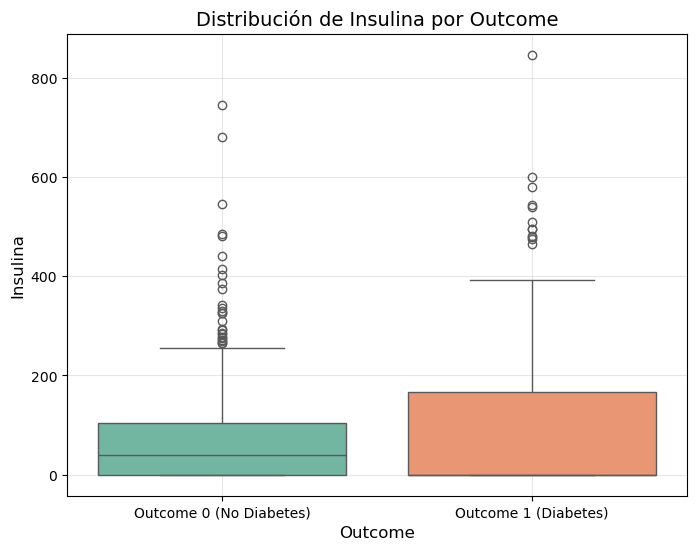

In [17]:
# Crear el boxplot de Insulin por Outcome
print(aux.groupby('Outcome').describe()['Insulin'])
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Insulin', data=aux, palette='Set2')
plt.title('Distribución de Insulina por Outcome', fontsize=14)
plt.xlabel('Outcome', fontsize=12)
plt.ylabel('Insulina', fontsize=12)
plt.xticks([0, 1], ['Outcome 0 (No Diabetes)', 'Outcome 1 (Diabetes)'])
plt.grid(alpha=0.3)
plt.show()

Promedio de insulina en rango normal: 82.81
Promedio de insulina en personas sin diabetes: 68.79
Promedio de insulina en rango normal y sin diabetes: 78.28
count    221.000000
mean      82.814480
std       31.165059
min       14.000000
25%       57.000000
50%       83.000000
75%      108.000000
max      135.000000
Name: Insulin, dtype: float64


<Axes: >

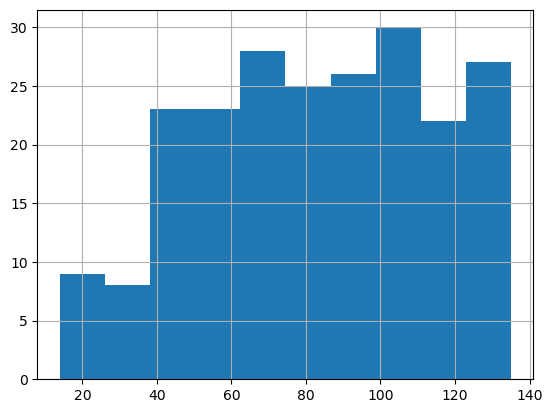

In [18]:
promedio_normal = aux[aux['insulin_cat'] == 'normal']['Insulin'].mean()
promedio_sin_diabetes = aux[aux['Outcome'] == 0]['Insulin'].mean()
promedio_normal_sin_diabetes = aux[(aux['insulin_cat'] == 'normal') & (aux['Outcome'] == 0)]['Insulin'].mean()
print(f"Promedio de insulina en rango normal: {promedio_normal:.2f}")
print(f"Promedio de insulina en personas sin diabetes: {promedio_sin_diabetes:.2f}")
print(f"Promedio de insulina en rango normal y sin diabetes: {promedio_normal_sin_diabetes:.2f}")
print(aux[aux['insulin_cat']=='normal'].describe()['Insulin'])
aux[aux['insulin_cat'] =='normal'].Insulin.hist()

19.61941034065503
611.6871139740277
0.33207770513291035


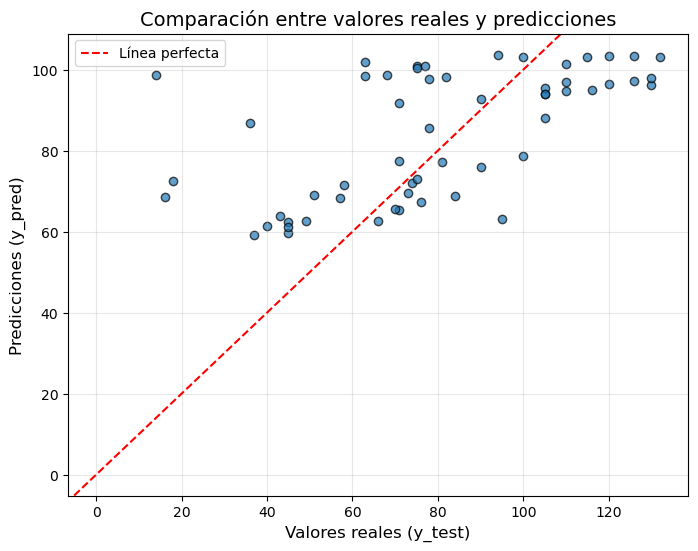

In [19]:

# Seleccionar las variables explicativas y el target
X = aux[aux['insulin_cat'] == 'normal'][['Glucose','SkinThickness','BloodPressure']]
y = aux[aux['insulin_cat'] == 'normal']['Insulin']

# Dividir los datos en entrenamiento y prueba (80% - 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = RandomForestRegressor(n_estimators=300,max_depth=2,min_samples_leaf=5,min_samples_split=5,random_state=42)
#model = XGBRegressor(n_estimators=300,learning_rate=0.1,max_depth=2,min_samples_leaf=5,min_samples_split=5,random_state=42)
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mae)
print(mse)
print(r2)

# Crear un gráfico de dispersión entre y_test y y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.title('Comparación entre valores reales y predicciones', fontsize=14)
plt.xlabel('Valores reales (y_test)', fontsize=12)
plt.ylabel('Predicciones (y_pred)', fontsize=12)
plt.axline((0, 0), slope=1, color='red', linestyle='--', label='Línea perfecta')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

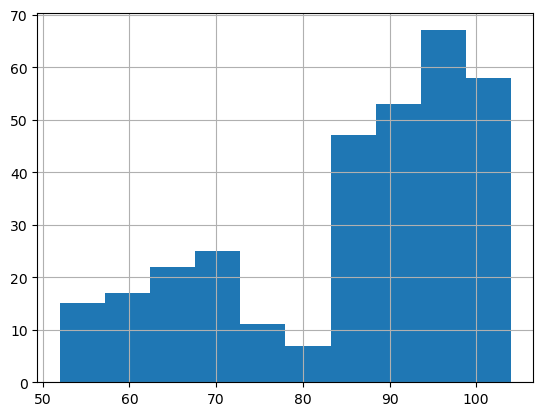

In [24]:
# Filtrar las filas con valores de insulina 'low' o 'high'
filas_a_imputar = aux[(aux['insulin_cat'] == 'low') | (aux['insulin_cat'] == 'high')]

# Crear un DataFrame con las variables explicativas para las filas a imputar
X_a_imputar = filas_a_imputar[['Glucose', 'SkinThickness', 'BloodPressure']]

# Usar el modelo para predecir los valores de insulina en las filas a imputar
predicciones_insulina = model.predict(X_a_imputar)

# Reemplazar los valores originales de insulina con las predicciones
aux.loc[filas_a_imputar.index, 'Insulin_pred'] = predicciones_insulina.astype('int64')

# Actualizar la columna 'insulin_cat' después de la imputación
aux = categorizar_insulina(aux)

# Mostrar el DataFrame con los valores imputados
aux[aux.Outcome==0].Insulin_pred.hist();

#### Presión sanguinea

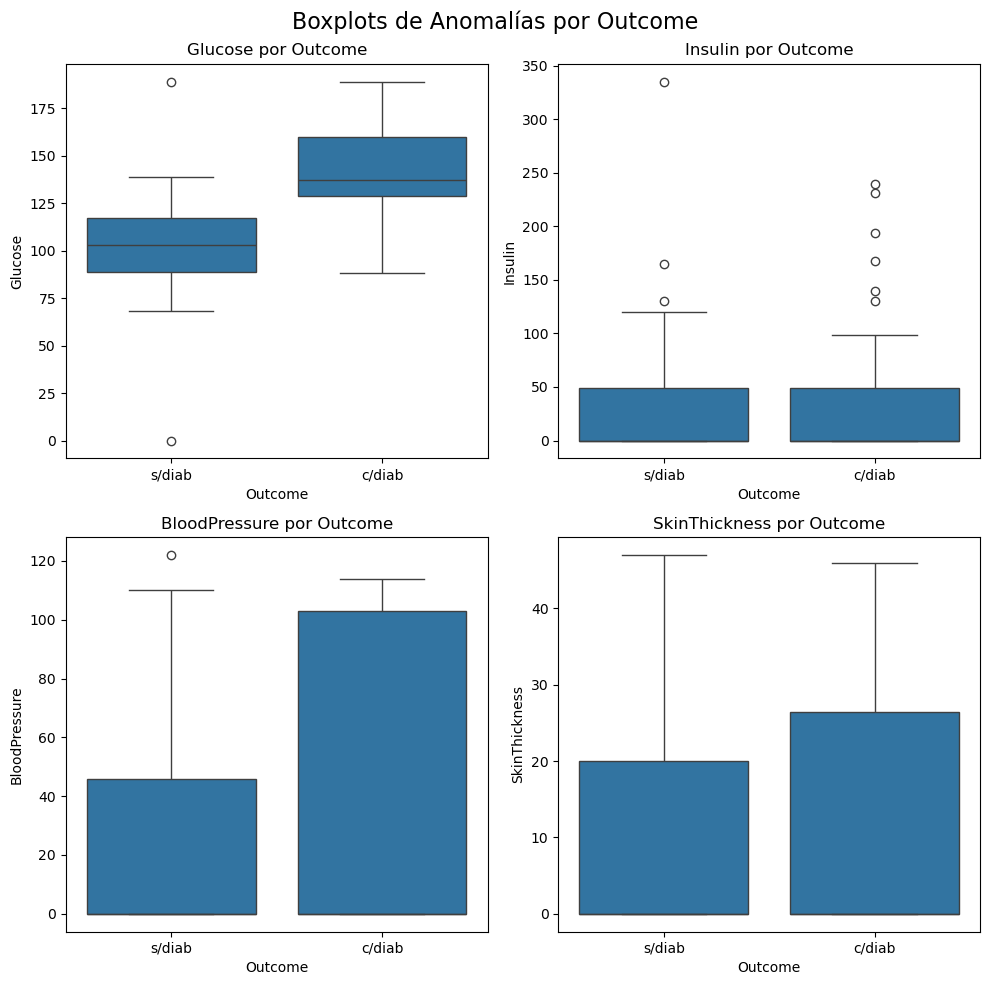

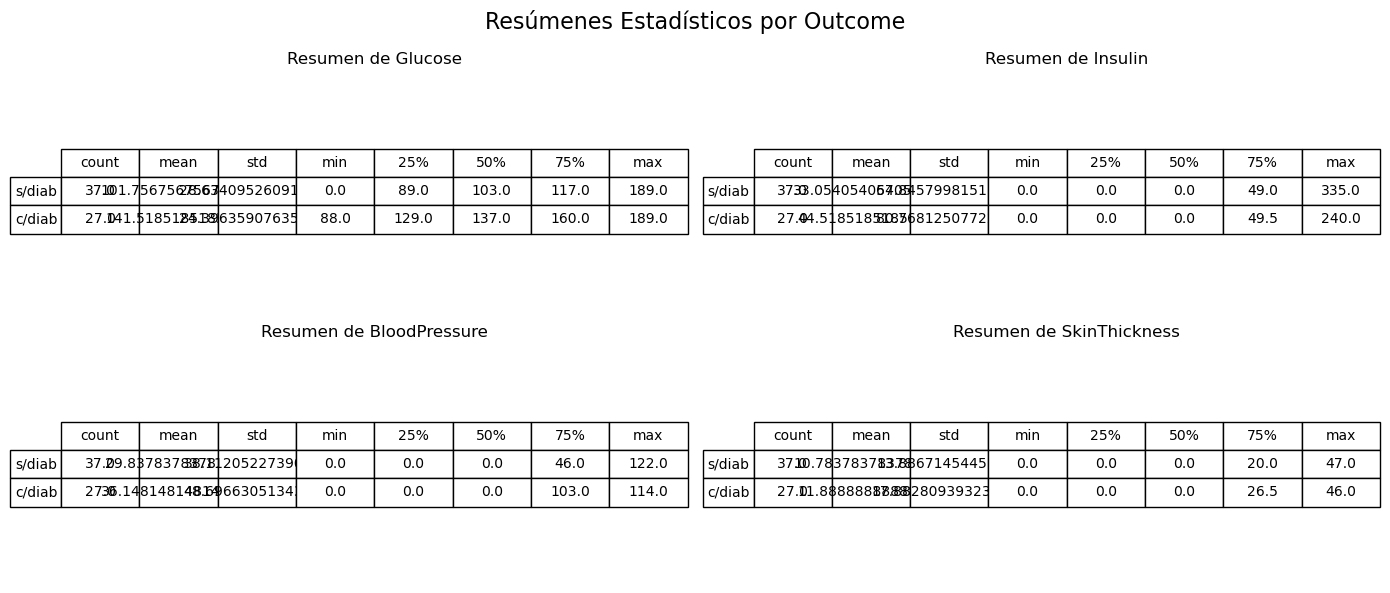

In [28]:
outcome_0,outcome_1 =  analizar_y_graficar_anomalias(anormales.get('BloodPressure'))

## **2. Exploración de Datos:**

### Visualizaciones univariadas y multivariadas

#### Visualizaciones univariadas

#### Visualizaciones multivariadas

### Estadísticas descriptivas

## **3. Implementación de Modelo: Entrenamiento**

### Modelos de Clasificación

### Evaluación de Modelos

### Comparación de Rendimiento

## **Implementación del modelo: Predicción**